In [1]:
import glob

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

from pylab import rcParams

from utils import METRICS, CONT_PARAMETERS, LOG_PARAMETERS, SET_PARAMETERS, INT_PARAMETERS, read_files,\
    top_mean_dev_auc, top_min_whole_validation_auc, top_min_dev_auc, read_files

In [2]:
rcParams['figure.figsize'] = 20, 5
pd.set_option('display.max_columns', None)

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
files = ['./experiments/thin.pkl']

In [5]:
CONT_PARAMETERS.remove('param_scale_pos_weight')
CONT_PARAMETERS.remove('param_bagging_fraction')
INT_PARAMETERS.remove('param_bagging_freq')
SET_PARAMETERS.remove('param_is_unbalance')
SET_PARAMETERS.remove('param_boost_from_average')

In [6]:
top_k = 100000
min_iterations = 100
query = 'param_bin_construct_sample_cnt > 4500'

In [7]:
best_mean_dev = top_mean_dev_auc(read_files(files, query), top_k)\
    .pipe(lambda x: x[x.groupby(['file', 'experiment_id']).iteration.transform('size') > min_iterations])
best_mean_dev.groupby(['file', 'experiment_id']).ngroups

404

In [8]:
best_min_dev = top_min_dev_auc(read_files(files, query), top_k)\
    .pipe(lambda x: x[x.groupby(['file', 'experiment_id']).iteration.transform('size') > min_iterations])
best_min_dev.groupby(['file', 'experiment_id']).ngroups

448

In [9]:
true_best = top_min_whole_validation_auc(read_files(files, query), top_k)\
    .pipe(lambda x: x[x.groupby(['file', 'experiment_id']).iteration.transform('size') > min_iterations])
true_best.groupby(['file', 'experiment_id']).ngroups

403

In [10]:
compare_columns = ['mean_dev_auc', 'mean_validation_auc',
               'mean_whole_validation_auc', 'min_dev_auc', 'min_validation_auc', 'min_whole_validation_auc']

In [11]:
best_mean_dev[compare_columns].describe().T

count      mean       std       min       25%  \
mean_dev_auc               58486.0  0.833153  0.000244  0.832714  0.832960   
mean_validation_auc        58486.0  0.809093  0.000838  0.806397  0.808561   
mean_whole_validation_auc  58486.0  0.809090  0.000941  0.806174  0.808417   
min_dev_auc                58486.0  0.821541  0.000819  0.818814  0.821030   
min_validation_auc         58486.0  0.806568  0.001162  0.802560  0.805807   
min_whole_validation_auc   58486.0  0.808804  0.000945  0.806124  0.808107   

                                50%       75%       max  
mean_dev_auc               0.833149  0.833331  0.833915  
mean_validation_auc        0.809180  0.809715  0.810953  
mean_whole_validation_auc  0.809081  0.809812  0.811509  
min_dev_auc                0.821486  0.821955  0.824457  
min_validation_auc         0.806643  0.807489  0.809292  
min_whole_validation_auc   0.808804  0.809508  0.811283

In [12]:
best_mean_dev.min_whole_validation_auc.corr(best_mean_dev.mean_dev_auc, method='spearman')

-0.15258660388324422

In [13]:
best_min_dev[compare_columns].describe().T

count      mean       std       min       25%  \
mean_dev_auc               76450.0  0.832010  0.000785  0.829909  0.831413   
mean_validation_auc        76450.0  0.809789  0.000454  0.807898  0.809521   
mean_whole_validation_auc  76450.0  0.809868  0.000734  0.806666  0.809375   
min_dev_auc                76450.0  0.822996  0.000375  0.822389  0.822692   
min_validation_auc         76450.0  0.807878  0.000829  0.804341  0.807370   
min_whole_validation_auc   76450.0  0.809629  0.000739  0.806453  0.809148   

                                50%       75%       max  
mean_dev_auc               0.832008  0.832635  0.833856  
mean_validation_auc        0.809822  0.810095  0.811059  
mean_whole_validation_auc  0.809931  0.810410  0.811845  
min_dev_auc                0.822961  0.823264  0.824457  
min_validation_auc         0.807989  0.808471  0.810190  
min_whole_validation_auc   0.809685  0.810172  0.811710

In [14]:
best_min_dev.min_whole_validation_auc.corr(best_min_dev.min_dev_auc, method='spearman')

-0.12050827472520546

In [15]:
true_best[compare_columns].describe().T

count      mean       std       min       25%  \
mean_dev_auc               77062.0  0.830447  0.001110  0.822861  0.829743   
mean_validation_auc        77062.0  0.810168  0.000653  0.805594  0.809866   
mean_whole_validation_auc  77062.0  0.811281  0.000370  0.810617  0.811013   
min_dev_auc                77062.0  0.820794  0.001305  0.812174  0.820036   
min_validation_auc         77062.0  0.808542  0.000933  0.801133  0.808014   
min_whole_validation_auc   77062.0  0.811019  0.000325  0.810607  0.810774   

                                50%       75%       max  
mean_dev_auc               0.830434  0.831175  0.833514  
mean_validation_auc        0.810231  0.810579  0.812235  
mean_whole_validation_auc  0.811208  0.811471  0.812862  
min_dev_auc                0.820919  0.821710  0.823922  
min_validation_auc         0.808588  0.809141  0.811477  
min_whole_validation_auc   0.810944  0.811182  0.812600

In [16]:
true_best.min_whole_validation_auc.corr(true_best.min_dev_auc, method='spearman')

-0.16407869717398177

In [17]:
best_mean_dev.merge(true_best, on=['file', 'experiment_id', 'iteration'])\
    .groupby(['file', 'experiment_id']).ngroups

8

In [18]:
best_mean_dev.merge(true_best, on=['file', 'experiment_id', 'iteration']).shape

(752, 227)

In [19]:
best_min_dev.merge(true_best, on=['file', 'experiment_id', 'iteration'])\
    .groupby(['file', 'experiment_id']).ngroups

97

In [20]:
best_min_dev.merge(true_best, on=['file', 'experiment_id', 'iteration']).shape

(5117, 227)

In [21]:
best = best_mean_dev

In [22]:
best.shape

(58486, 115)

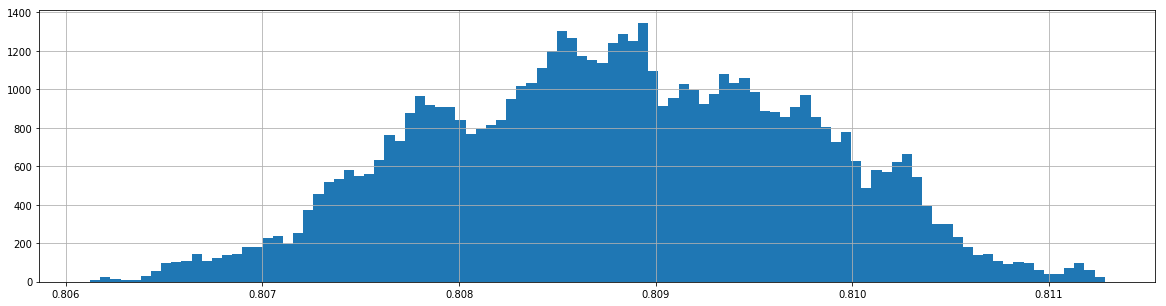

In [23]:
best.min_whole_validation_auc.hist(bins=100);

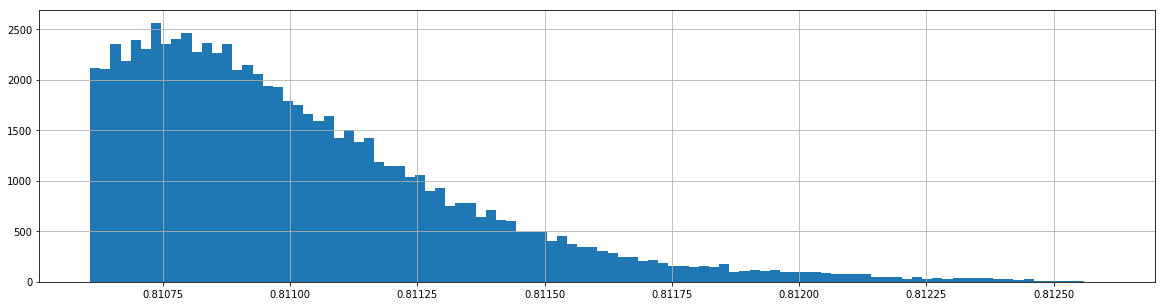

In [24]:
true_best.min_whole_validation_auc.hist(bins=100);

In [25]:
best_iteration = best.sort_values('mean_dev_auc').groupby(['file', 'experiment_id']).last()

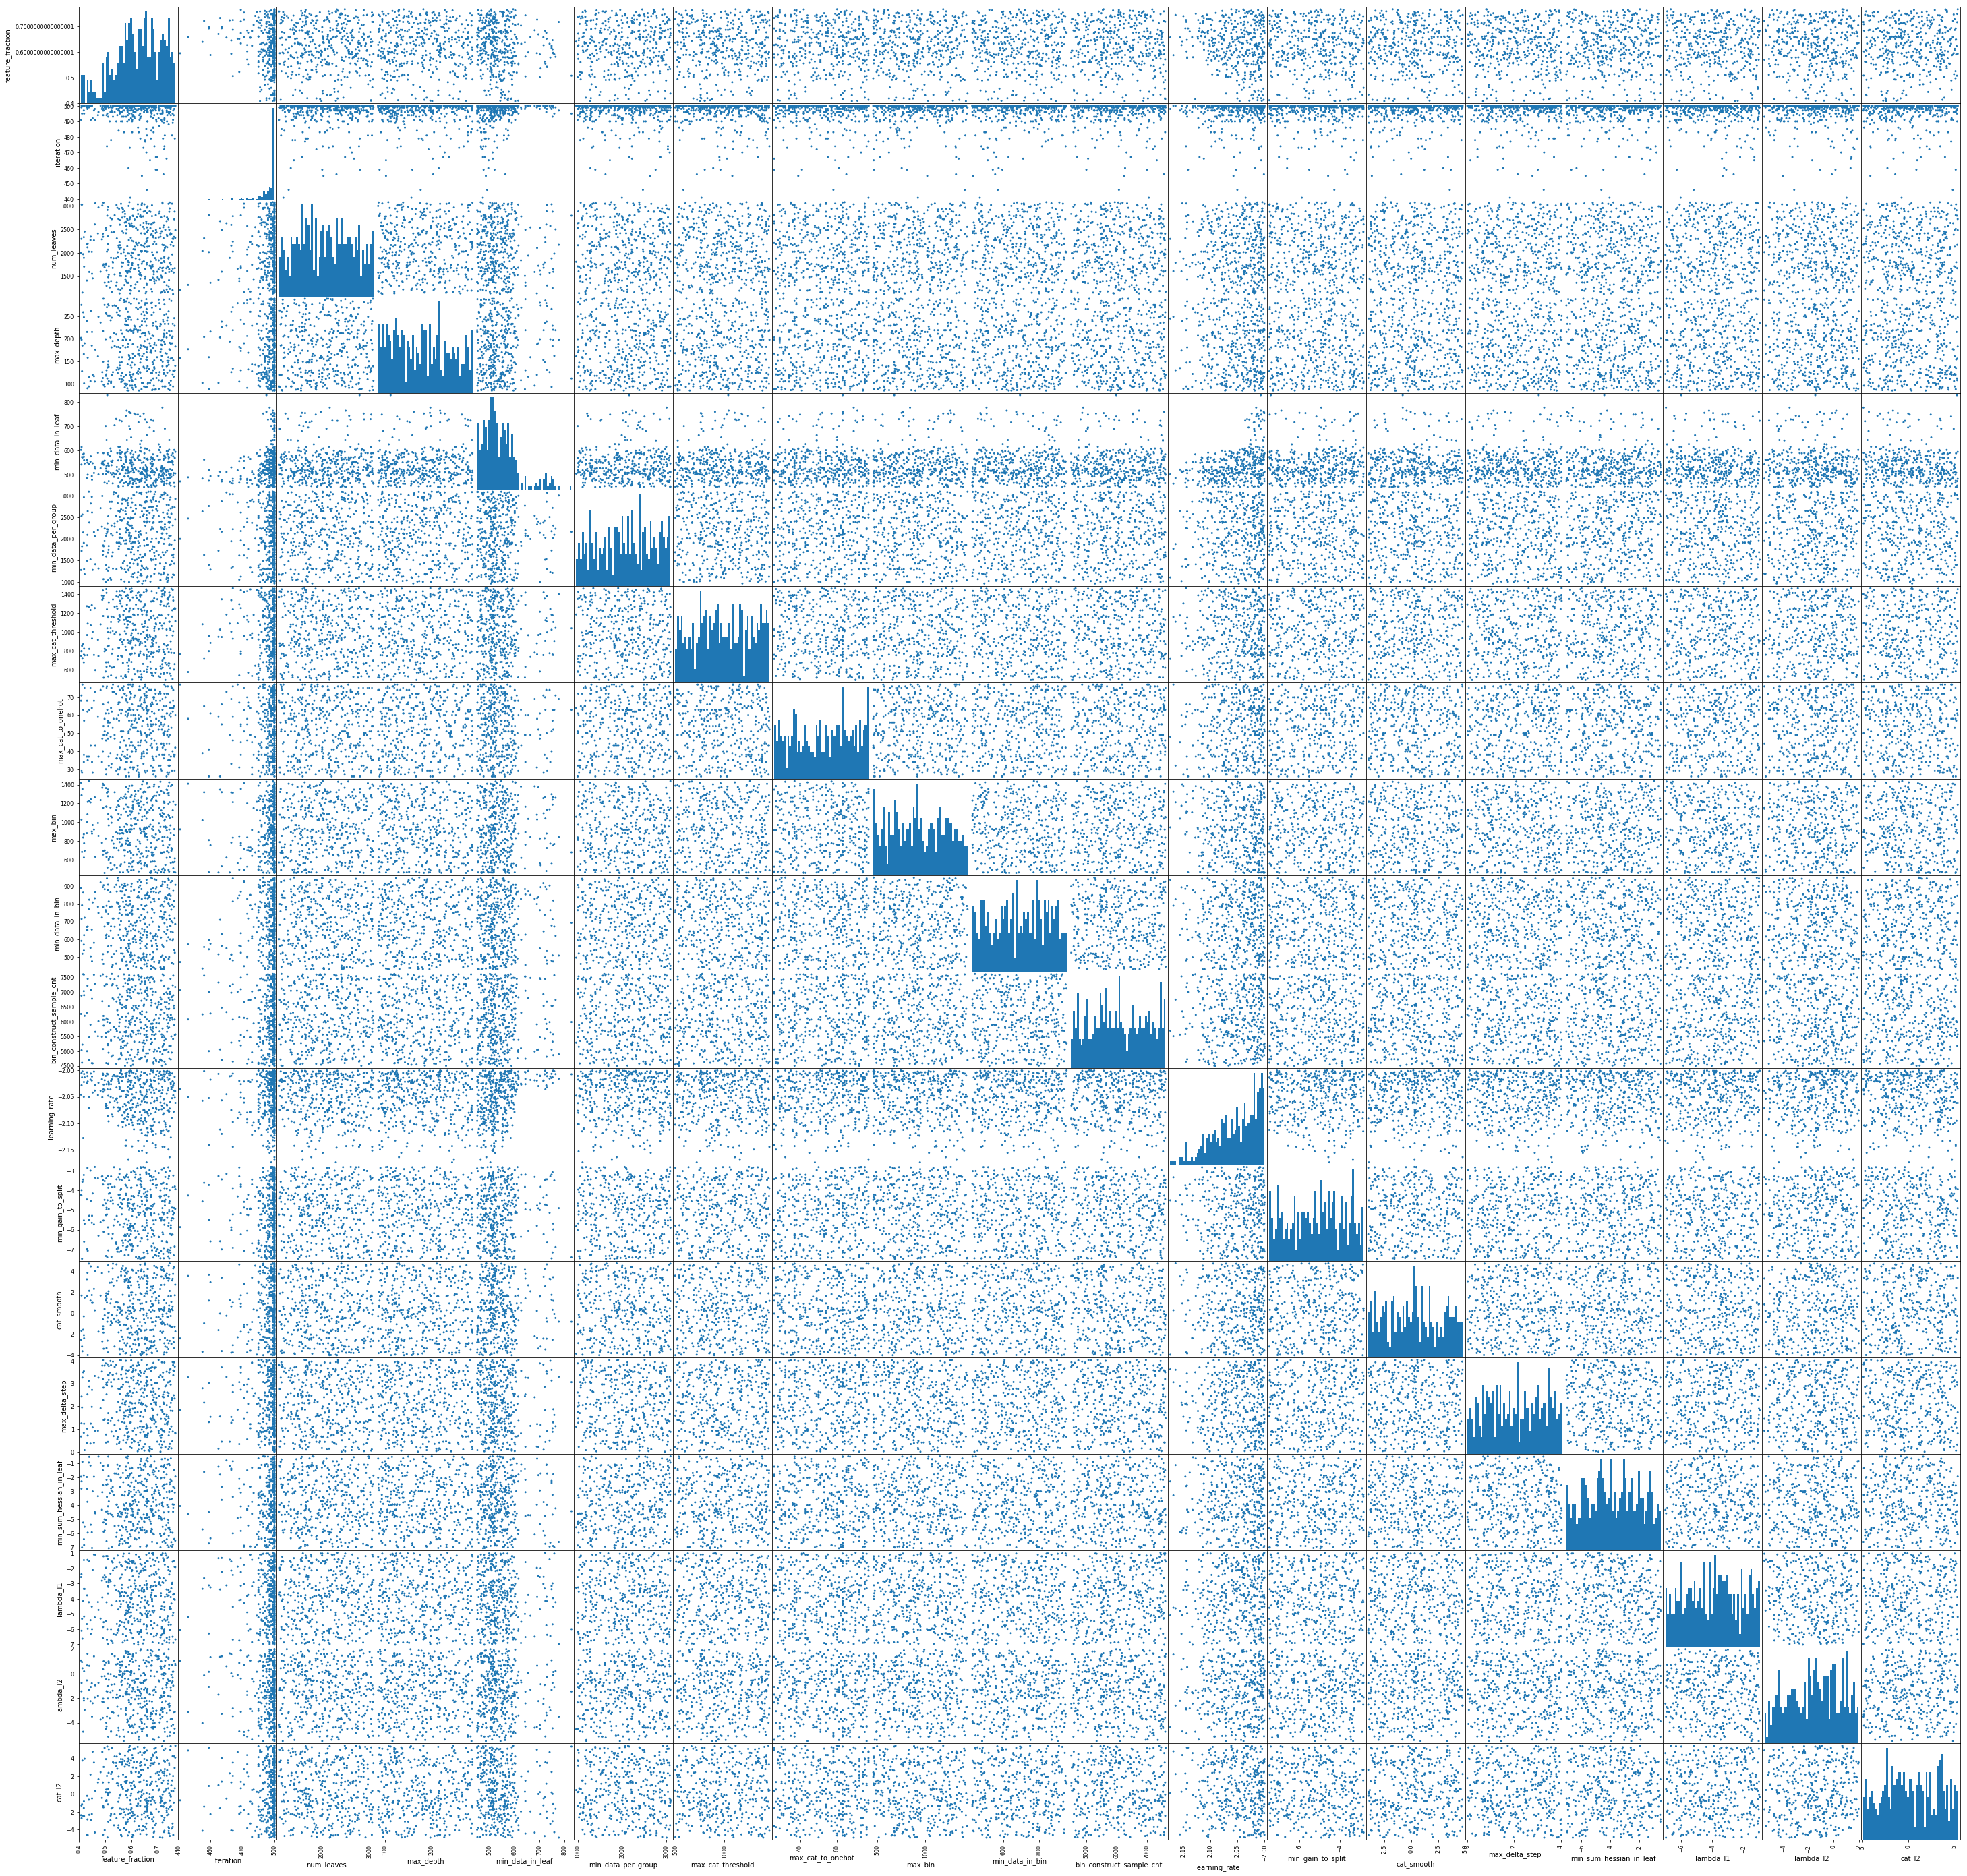

In [26]:
pd.plotting.scatter_matrix(
    pd.concat([best_iteration[CONT_PARAMETERS + INT_PARAMETERS], 
               np.log10(best_iteration[list(set(LOG_PARAMETERS))])],
              axis='columns',
              sort=True
             ).rename(lambda x: x.replace('param_', ''), axis='columns'),
    alpha=1, figsize=(50, 50), hist_kwds={'bins': 50});

### check failures in best selected parameter range

In [27]:
best_range = best\
    [[c for c in best.columns if c.startswith('param_') and not c in SET_PARAMETERS]]\
    .drop(columns=['param_seed', 'param_bagging_enable'], errors='ignore')\
    .quantile([0, 1]).T
best_range

0.0            1.0
param_bin_construct_sample_cnt  4.501000e+03    7623.000000
param_cat_l2                    1.311286e-05  270107.560670
param_cat_smooth                9.906211e-05   60594.417457
param_feature_fraction          4.070164e-01       0.765745
param_lambda_l1                 9.378740e-08       0.109690
param_lambda_l2                 3.156441e-06      95.324105
param_learning_rate             6.710180e-03       0.010000
param_max_bin                   4.580000e+02    1439.000000
param_max_cat_threshold         4.940000e+02    1461.000000
param_max_cat_to_onehot         2.600000e+01      77.000000
param_max_delta_step            1.018029e+00   10905.677932
param_max_depth                 8.500000e+01     289.000000
param_min_data_in_bin           4.280000e+02     951.000000
param_min_data_in_leaf          4.500000e+02     829.000000
param_min_data_per_group        9.650000e+02    3094.000000
param_min_gain_to_split         3.353671e-08       0.001535
param_min_sum_hessian_in_leaf   8.689048e-08       0.322672
param_num_leaves                1.118000e+03    3079.000000

In [28]:
for row in best_range.itertuples():
    name = row.Index[6:]
    if row.Index in CONT_PARAMETERS:
        print(f'        \'{name}\': uniform(loc={row[1]}, scale={row[2] - row[1]}),')
    elif row.Index in INT_PARAMETERS:
        print(f'        \'{name}\': randint({int(row[1])}, {int(row[2])}),')
    elif row.Index in LOG_PARAMETERS:
        print(f'        \'{name}\': loguniform(low={np.log10(row[1])}, high={np.log10(row[2])}, base=10),')

        'bin_construct_sample_cnt': randint(4501, 7623),
        'cat_l2': loguniform(low=-4.882302419632391, high=5.43153674083865, base=10),
        'cat_smooth': loguniform(low=-4.004092447219669, high=4.782432614610142, base=10),
        'feature_fraction': uniform(loc=0.40701641270764705, scale=0.35872895431381396),
        'lambda_l1': loguniform(low=-7.027855523525633, high=-0.9598326024803461, base=10),
        'lambda_l2': loguniform(low=-5.5008023717224654, high=1.979202734540725, base=10),
        'learning_rate': loguniform(low=-2.1732658076329314, high=-2.000010527504574, base=10),
        'max_bin': randint(458, 1439),
        'max_cat_threshold': randint(494, 1461),
        'max_cat_to_onehot': randint(26, 77),
        'max_delta_step': loguniform(low=0.007760210321335165, high=4.03765266789748, base=10),
        'max_depth': randint(85, 289),
        'min_data_in_bin': randint(428, 951),
        'min_data_in_leaf': randint(450, 829),
        'min_data_per_group': randin

In [29]:
dfs = []
for f in files:
    df = pd.read_pickle(f).assign(file=f)
    for (n, l, h) in best_range.itertuples():
        df = df[(((df[n] >= l) & (df[n] <= h))
                 | df[n].isna())].copy()
    dfs.append(df)

limited = pd.concat(dfs, ignore_index=True, sort=True)
del dfs
limited.shape

(775500, 115)

In [30]:
limited_best_iteration = limited.sort_values('min_whole_validation_auc').groupby(['file', 'experiment_id']).last()
limited_best_iteration.shape

(1551, 113)

In [31]:
limited_best_iteration.min_whole_validation_auc.describe()

count    1551.000000
mean        0.810060
std         0.000860
min         0.806718
25%         0.809498
50%         0.810127
75%         0.810694
max         0.812514
Name: min_whole_validation_auc, dtype: float64

### single best parameter set

In [32]:
single_best = best.iloc[0]

In [33]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(single_best)

cnt                                                              3
experiment_id                                                 3081
file                                        ./experiments/thin.pkl
iteration                                                      498
max_dev_auc                                               0.858518
max_dev_binary_error                                      0.281278
max_dev_binary_logloss                                    0.523524
max_dev_kldiv                                             0.523524
max_dev_map_10                                            0.878889
max_dev_map_100                                           0.631557
max_dev_map_1000                                          0.659928
max_validation_auc                                        0.812103
max_validation_binary_error                               0.299503
max_validation_binary_logloss                             0.540851
max_validation_kldiv                                      0.54

In [34]:
# todo generate 1% neighborhood around best parameter set

In [35]:
worst_best = best.iloc[-1]

In [36]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(worst_best)

cnt                                                              3
experiment_id                                                 1693
file                                        ./experiments/thin.pkl
iteration                                                      370
max_dev_auc                                               0.855594
max_dev_binary_error                                      0.282165
max_dev_binary_logloss                                    0.526876
max_dev_kldiv                                             0.526876
max_dev_map_10                                                0.89
max_dev_map_100                                            0.58058
max_dev_map_1000                                          0.643573
max_validation_auc                                        0.811373
max_validation_binary_error                               0.301632
max_validation_binary_logloss                             0.541351
max_validation_kldiv                                      0.54